# Exercice 1
1) Combien y a t'il de dominos dans un jeu classique ?  
Un jeu de dominos classique est composé de 28 pièces dont chaque moitié comporte un certain nombre de petits points allant de 0 à 6, sans doublons, ce qui donne 7 * 4 = 28 pièces.

2) Pourquoi est-il possible que le jeu s'arrête sans avoir posé tous les dominos ?  
Il est possible que le jeu s'arrete avant d'avoir posé tout les dominos car chaque moitié comporte un certain nombre de petits points allant de 0 à 6. Si les combinaisons de dominos disponibles dans la pioche ne sont pas compatibles avec les extrémités de la chaîne déjà construite, le jeu peut se terminer sans avoir posé tous les dominos. Cela dépend de la chance et de l'ordre dans lequel les dominos sont tirés.

3) Pourquoi X et Y sont des variables aléatoires ?  
X et Y sont des variables aléatoires car leur valeur dépend du hasard et des choix effectués tout au long du jeu. La variable aléatoire X représente le nombre de dominos posés dans la chaîne, et elle dépend du nombre de dominos tirés et de la possibilité de les placer à chaque étape. De même, la variable aléatoire Y représente le nombre de points restants dans la pioche, ce qui dépend également de la manière dont les dominos sont tirés et placés. En raison de la nature aléatoire du jeu, X et Y prennent des valeurs différentes à chaque partie, d'où leur caractère aléatoire. Pour comprendre leur comportement, il est nécessaire d'étudier leur distribution de probabilité.

# Exercice 2
- Quelle structure de données pour représenter la pioche de dominos restants ?
    - La structure nécéssaire est une file car on insere en queue mais on supprime en tete
- Quelle structure de données pour représenter la chaîne de dominos déjà construite? (Sachant qu'il suffit de considérer l'information pertinente pour le déroulement du jeu.)
    - Une liste car c'est une fassons simple de stocker les dominos mis en place sur le tapis
- Comment savoir si le jeu est 
fini ?
    - si on ne peut plus inserer en tete ou en queue les dominos de la pioche.
- Est-il éventuellement utile d'écrire certaines sous-fonctions, afin de clarifier le code ?  
    - Ca peut être plus simple à comprendre le code, notamment pour le comptage de Y.

exemple de file en python :

In [3]:
queue = []                 # la file est vide

queue.append(1)            # la file contient [1]
queue.append(2)            # la file contient [1, 2]
queue.append(3)            # la file contient [1, 2, 3]

result = queue.pop(0)      # la file contient [2, 3]

print(result)
print(queue)

1
[2, 3]


**Initialisation et affichage de la pioche**

In [4]:
import random

# initialisation de la pioche contenant 28 pièces
pioche = [[i, j] for i in range(1,7) for j in range(i, 7)]

# Exemple d'utilisation : affichez la file de dominos
for domino in pioche:
    print(domino)

[1, 1]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[2, 2]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[3, 3]
[3, 4]
[3, 5]
[3, 6]
[4, 4]
[4, 5]
[4, 6]
[5, 5]
[5, 6]
[6, 6]


In [5]:
def comptePoints(pioche):
    return sum(sum(domino) for domino in pioche)

In [112]:
# Fonction pour simuler une partie du jeu de dominos
def une_chaine_domino():
    # Liste représentant les dominos sur le jeu
    tapis = []

    #initialisation d'une variable pour compter le nombre de pioche dans la pioche
    cpt = 0

    Y = 0
    
    # Liste représentant la pioche de dominos restants
    pioche = [(i, j) for i in range(1, 7) for j in range(i, 7)]
    random.shuffle(pioche)

    # Tant que la pioche n'est pas vide et qu'on peut poser des dominos
    while pioche:
        domino = pioche.pop(0)  # Tirer un domino au hasard
        #pioche.remove(domino)  # Retirer le domino de la pioche

        if not tapis:  # Si c'est le premier domino, ajoutez-le directement
            tapis.append(domino)
        else:
            # Vérifiez si le domino peut être placé à l'une des extrémités de la chaîne
            if domino[0] == tapis[0][0] or domino[1] == tapis[0][0]:
                tapis.insert(0, domino)  # Placez-le au début de la chaîne
                cpt = 0;
            elif domino[0] == tapis[-1][1] or domino[1] == tapis[-1][1]: # On regarde le second argument du premier couple du tapis
                tapis.append(domino)  # Placez-le à la fin de la chaîne
                cpt = 0;
            else:
                pioche.append(domino)
                cpt = cpt + 1;
                if(cpt > len(pioche)):
                    break  # Si après un tour entier de la pioche est éfféctué sans pour voir placer un domino

    # Valeur de X : nombre de dominos posés dans la chaîne
    X = len(tapis)

    # Valeur de Y : nombre de points restants dans la pioche
    for i in pioche :
        Y = Y + i[0] + i[1]

    return X, Y

# Utilisation de la fonction
X, Y = une_chaine_domino()
print(f"X = {X}, Y = {Y}")

X = 14, Y = 54


# Exercice 3 (Analyse probabiliste).  
Simulez un grand nombre de réalisations du jeu (au moins 10000).  
Puis, à l'aide des méthodes déjà vues en cours et en TP :

In [113]:
# Nombre de réalisations du jeu
nombre_de_realisations = 10000

# Liste pour stocker les résultats des n réalisations
resultats = []

# Simulez le jeu un grand nombre de fois et stockez les résultats
for _ in range(nombre_de_realisations):
    X, Y = une_chaine_domino()
    resultats.append((X, Y))

# Vous pouvez maintenant analyser les résultats pour obtenir des statistiques
# Par exemple, vous pouvez calculer la moyenne et l'écart-type pour X et Y.
moyenne_X = sum(X for X, Y in resultats) / nombre_de_realisations
moyenne_Y = sum(Y for X, Y in resultats) / nombre_de_realisations

# Affichez les résultats statistiques
print(f"Moyenne de X : {moyenne_X}")
print(f"Moyenne de Y : {moyenne_Y}")

Moyenne de X : 13.7448
Moyenne de Y : 51.7941


1. Estimer et représenter la loi de probabilité de la variable X

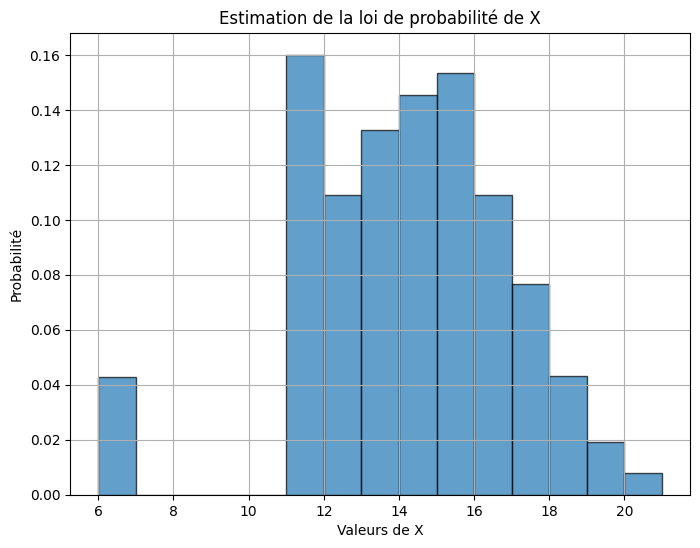

In [114]:
import matplotlib.pyplot as plt
# Extraire les valeurs de X à partir des résultats
valeurs_X = [X for X, Y in resultats]

# Estimation de la loi de probabilité de X
plt.figure(figsize=(8, 6))
plt.hist(valeurs_X, bins=range(min(valeurs_X), max(valeurs_X) + 1), density=True, alpha=0.7, edgecolor='black')
plt.title('Estimation de la loi de probabilité de X')
plt.xlabel('Valeurs de X')
plt.ylabel('Probabilité')
plt.grid(True)
plt.show()

2. Calculer et tracer la fonction de répartition de X

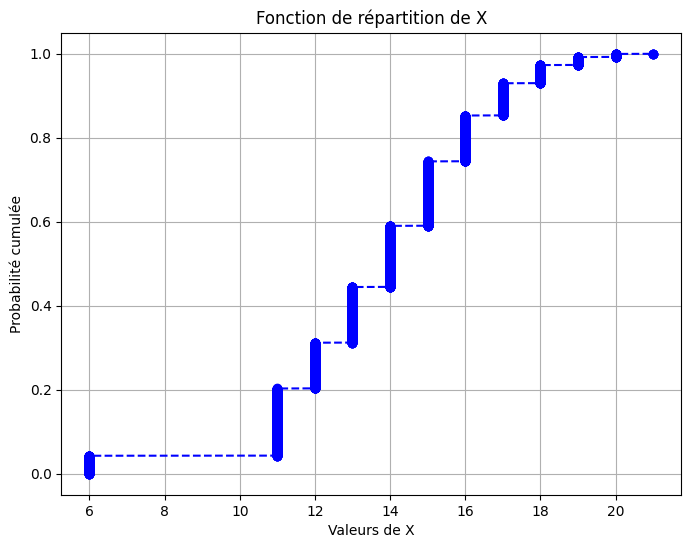

In [115]:
import numpy as np
# Calcul de la fonction de répartition de X
valeurs_X_triees = sorted(valeurs_X)
fonction_de_repartition_X = np.arange(len(valeurs_X_triees)) / len(valeurs_X_triees)

# Traçage de la fonction de répartition de X
plt.figure(figsize=(8, 6))
plt.plot(valeurs_X_triees, fonction_de_repartition_X, marker='o', linestyle='--', color='b')
plt.title('Fonction de répartition de X')
plt.xlabel('Valeurs de X')
plt.ylabel('Probabilité cumulée')
plt.grid(True)
plt.show()

3. Estimer l'espérance de X

In [116]:
# Estimation de l'espérance de X
esperance_X = np.mean(valeurs_X)
print(f"Espérance de X : {esperance_X}")

Espérance de X : 13.7448


4. Estimer la variance de X

In [117]:
# Estimation de la variance de X
variance_X = np.var(valeurs_X)
print(f"Variance de X : {variance_X}")

Variance de X : 7.432672959999999


5. Mêmes questions pour la variable Y

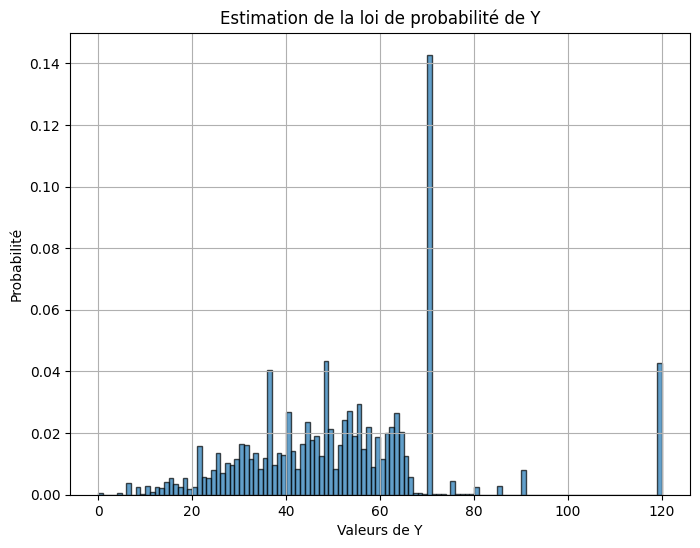

In [118]:
# Extraire les valeurs de Y à partir des résultats
valeurs_Y = [Y for X, Y in resultats]

# Estimation de la loi de probabilité de Y
plt.figure(figsize=(8, 6))
plt.hist(valeurs_Y, bins=range(min(valeurs_Y), max(valeurs_Y) + 1), density=True, alpha=0.7, edgecolor='black')
plt.title('Estimation de la loi de probabilité de Y')
plt.xlabel('Valeurs de Y')
plt.ylabel('Probabilité')
plt.grid(True)
plt.show()

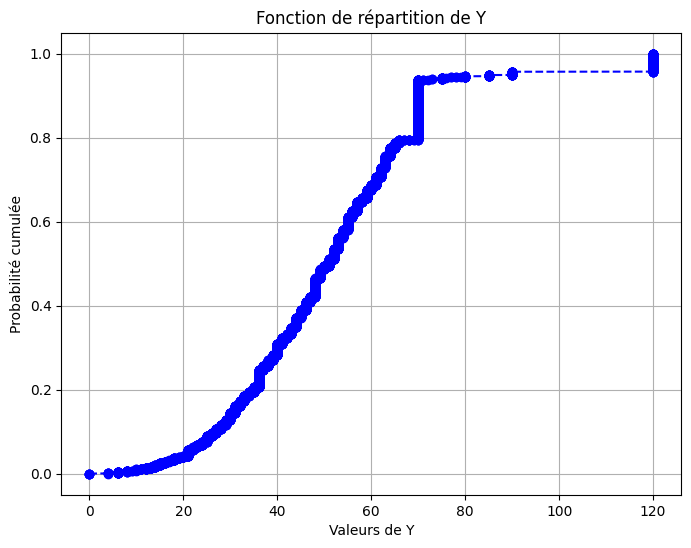

In [119]:
# Calcul de la fonction de répartition de Y
valeurs_Y_triees = sorted(valeurs_Y)
fonction_de_repartition_Y = np.arange(len(valeurs_Y_triees)) / len(valeurs_Y_triees)

# Traçage de la fonction de répartition de Y
plt.figure(figsize=(8, 6))
plt.plot(valeurs_Y_triees, fonction_de_repartition_Y, marker='o', linestyle='--', color='b')
plt.title('Fonction de répartition de Y')
plt.xlabel('Valeurs de Y')
plt.ylabel('Probabilité cumulée')
plt.grid(True)
plt.show()

In [120]:
# Estimation de l'espérance de Y
esperance_Y = np.mean(valeurs_Y)
print(f"Espérance de Y : {esperance_Y}")

Espérance de Y : 51.7941


In [121]:
# Estimation de la variance de Y
variance_Y = np.var(valeurs_Y)
print(f"Variance de Y : {variance_Y}")

Variance de Y : 466.43230518999997


6. Estimer la probabilité de succès au jeu

In [122]:
# Définition du nombre de dominos dans un jeu classique
nombre_de_dominos = 28

# Compter le nombre de jeux finis (X égal au nombre total de dominos)
jeux_finis = sum(1 for X, Y in resultats if X == nombre_de_dominos)

# Compter le nombre de jeux non finis (X différent de 28)
jeux_non_finis = nombre_de_realisations - jeux_finis

print(f"Nombre de jeux finis : {jeux_finis}")
print(f"Nombre de jeux non finis : {jeux_non_finis}")

Nombre de jeux finis : 0
Nombre de jeux non finis : 10000


In [123]:
# Estimer la probabilité de succès
probabilite_de_succes = (jeux_finis / nombre_de_realisations) * 100
print(f"Probabilité de succès au jeu : {probabilite_de_succes}")

Probabilité de succès au jeu : 0.0


7. Estimer le nombre médian de points restants dans la pioche

In [124]:
# Calcul de la médiane des points restants dans la pioche (Y)
median_points_restants = np.median(valeurs_Y)
print(f"Nombre médian de points restants dans la pioche : {median_points_restants}")

Nombre médian de points restants dans la pioche : 51.0


# Exercice 4 (Covariance et corrélation) :

1) Effectuer 200 réalisations du jeu et représenter les valeurs correspondantes de X et Y sous la forme d'un nuage de points (avec un point (x,y) pour chaque réalisation de X et Y observée). Interprétez le résultat.

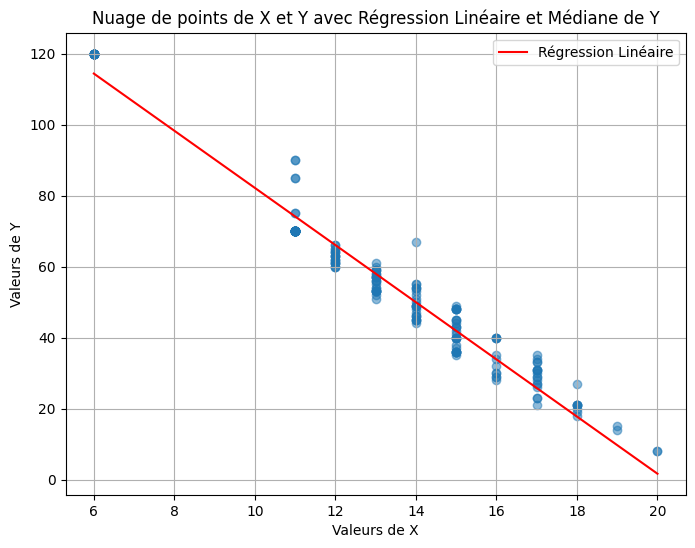

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# ... (votre code pour obtenir X_valeurs et Y_valeurs)
# Effectuer 200 réalisations du jeu
nombre_de_realisations = 200
resultats = [une_chaine_domino() for _ in range(nombre_de_realisations)]

# Extraire les valeurs de X et Y dans des listes distinctes
X_valeurs = [X for X, Y in resultats]
Y_valeurs = [Y for X, Y in resultats]

# Ajuster une régression linéaire aux points
coefficients = np.polyfit(X_valeurs, Y_valeurs, 1)
slope, intercept = coefficients

# Créer un nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(X_valeurs, Y_valeurs, alpha=0.5)

# Tracer la droite de régression linéaire
x_range = np.linspace(min(X_valeurs), max(X_valeurs), 100)
y_fit = slope * x_range + intercept
plt.plot(x_range, y_fit, color='red', label=f'Régression Linéaire')

plt.title('Nuage de points de X et Y avec Régression Linéaire et Médiane de Y')
plt.xlabel('Valeurs de X')
plt.ylabel('Valeurs de Y')
plt.legend()
plt.grid(True)
plt.show()


On peut voir ci-dessus sur le graphique, que la covariance est négative. Les valeurs X et Y ne sont donc pas indépendantes.

2) On définit le nombre Z = X × Y comme le produit entre X et Y . Expliquer pourquoi Z est une variable aléatoire.

Z est une variable aléatoire car c'est un produit de variables àléatoires.

3. Estimer l'espérance de X, Y et Z. Véri
er et justifier si X et Y sont indépendants.
4. Estimer la covariance des variables X et Y , puis leur coefficient de corrélation. Commenter.

In [111]:
esperance_X = np.mean(X_valeurs)
esperance_Y = np.mean(Y_valeurs)

# Calculer la moyenne de X et Y
moyenne_X = np.mean([X for X, Y in resultats])
moyenne_Y = np.mean([Y for X, Y in resultats])

# Calcul de Z = X * Y pour chaque réalisation
Z_valeurs = [X * Y for X, Y in resultats]
esperance_Z = np.mean(Z_valeurs)

# Calcul de la covariance entre X et Y
covariance_XY = np.cov(X_valeurs, Y_valeurs)[0, 1]

# Vérification d'indépendance
independants = abs(covariance_XY) < 1e-10

# Calculer l'écart-type de X et Y
ecart_type_X = np.std([X for X, Y in resultats])
ecart_type_Y = np.std([Y for X, Y in resultats])

# Calculer le coefficient de corrélation entre X et Y
coeff_correlation = covariance_XY / (ecart_type_X * ecart_type_Y)

# Afficher les résultats statistiques
print("esperance de X : ", esperance_X)
print("esperance de Y : ", esperance_Y)
print("esperance de Z : ", esperance_Z)
print("covariance de X et Y : ", covariance_XY)
print("X et Y indépendants ? : ", independants)
print("Moyenne de X :", moyenne_X)
print("Moyenne de Y :", moyenne_Y)
print("Écart-type de X :", ecart_type_X)
print("Écart-type de Y :", ecart_type_Y)
print("Coefficient de corrélation entre X et Y :", coeff_correlation)

esperance de X :  13.715
esperance de Y :  51.925
esperance de Z :  663.19
covariance de X et Y :  -49.207412060301515
X et Y indépendants ? :  False
Moyenne de X : 13.715
Moyenne de Y : 51.925
Écart-type de X : 2.5305681180319963
Écart-type de Y : 19.82421183805298
Coefficient de corrélation entre X et Y : -0.9808815438670045
